In [1]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol (TSLA for Tesla)
ticker = "TSLA"

# Download historical data (e.g., for the past 5 years - adjust as needed)
tesla_data = yf.download(ticker, period="5y")  # You can adjust the 'period'

# Reset the index
tesla_data.reset_index(inplace=True)

# Save to CSV (optional, but good practice)
tesla_data.to_csv("tesla_stock_data.csv", index=False)  # Saves without the index

# Display the first five rows
print(tesla_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA
0      2020-02-21  60.066666  60.870667  58.696667  60.465332  214722000
1      2020-02-24  55.585999  57.566666  54.813332  55.933334  227883000
2      2020-02-25  53.327332  57.106667  52.466667  56.599998  259357500
3      2020-02-26  51.919998  54.220669  51.740665  52.166668  211282500
4      2020-02-27  45.266666  49.318001  44.599998  48.666668  364158000


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Tesla revenue page (replace with the correct URL if needed)
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"  # Example URL - verify it's correct

try:
    # Send a request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table containing the revenue data.  This is the trickiest part, as it depends on the website's structure.
    # Inspect the website's HTML source to identify the correct table.  Here are some common ways to find it:

    # Method 1: Finding by table ID (if the table has one)
    # table = soup.find("table", id="your_table_id")  # Replace your_table_id

    
    # If the table is found, convert it to a Pandas DataFrame
    if table:
        tesla_revenue = pd.read_html(str(table))[0]  # read_html returns a list of DataFrames; we take the first one.

        # Clean up the DataFrame (this will likely need adjustments based on the website)
        # 1. Rename columns (if needed)
        # tesla_revenue.columns = ["Date", "Revenue"] #Example, adjust to the real names

        # 2. Remove any extra rows or columns (if needed)
        # tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ''] #Example, remove rows where Revenue is empty

        # 3. Convert 'Revenue' to numeric (after cleaning)
        # tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', ''), errors='coerce') #Example, adjust as needed

        # 4. Convert 'Date' to datetime (if needed)
        # tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date']) # Example, adjust format if needed

        # 5. Reverse the order of rows so that the most recent data is at the bottom
        tesla_revenue = tesla_revenue.iloc[::-1]

        # Display the last five rows
        print(tesla_revenue.tail())

    else:
        print("Error: Could not find the revenue table on the page.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

#---  Include the code above AND the output of print(tesla_revenue.tail()) in your screenshot. ---


Error fetching URL: 403 Client Error: Forbidden for url: https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue


In [1]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol (GME for GameStop)
ticker = "GME"

# Download historical data (e.g., for the past 5 years - adjust as needed)
gme_data = yf.download(ticker, period="5y")  # You can adjust the 'period'

# Reset the index
gme_data.reset_index(inplace=True)

# Save to CSV (optional, but good practice)
gme_data.to_csv("gme_stock_data.csv", index=False)  # Saves without the index

# Display the first five rows
print(gme_data.head())

#---  For the screenshot, you'd include the code above AND the output of the print(gme_data.head()) command.  ---

# Example of how the output would look (the actual numbers will vary):
#         Date        Open        High         Low       Close    Adj Close    Volume
# 0 2018-10-26  13.430000  13.680000  13.310000  13.450000  11.531278   1499500
# 1 2018-10-29  13.360000  13.510000  13.250000  13.350000  11.445763   1344900
# 2 2018-10-30  13.430000  13.510000  13.230000  13.290000  11.394462   1346600
# 3 2018-10-31  13.350000  13.500000  13.290000  13.400000  11.487063   1455500
# 4 2018-11-01  13.400000  13.450000  13.150000  13.200000  11.317562   1742400

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-02-26  0.8475  0.9050  0.8400  0.8950  18899200
1      2020-02-27  0.8675  0.9075  0.7950  0.8075  15518000
2      2020-02-28  0.9000  0.9300  0.8350  0.8350  18768800
3      2020-03-02  0.9575  0.9625  0.8475  0.9000  12833600
4      2020-03-03  0.9075  0.9725  0.8750  0.9700  17130000


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the GameStop revenue page (replace with the correct URL if needed)
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"  # Example URL - verify it's correct

try:
    # Send a request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table containing the revenue data.  This is the trickiest part, as it depends on the website's structure.
    # Inspect the website's HTML source to identify the correct table.
    table = soup.find("table", class_="historical_data_table table") #Finds the table using the class

    # If the table is found, convert it to a Pandas DataFrame
    if table:
        gme_revenue = pd.read_html(str(table))[0]  # read_html returns a list of DataFrames; we take the first one.

        # Clean up the DataFrame
        gme_revenue.columns = ["Date", "Revenue"] #Rename columns
        gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '') #Remove $ and ,
        gme_revenue.dropna(inplace=True) #Drop Nan values
        gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""] #Remove empty strings
        gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue']) #Convert to numeric
        gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date']) #Convert date column to datetime
        gme_revenue = gme_revenue.iloc[::-1] #reverse the order of the dataframe.

        # Display the last five rows
        print(gme_revenue.tail())

    else:
        print("Error: Could not find the revenue table on the page.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

#---  Include the code above AND the output of print(gme_revenue.tail()) in your screenshot. ---

Error fetching URL: 403 Client Error: Forbidden for url: https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue


[*********************100%***********************]  1 of 1 completed


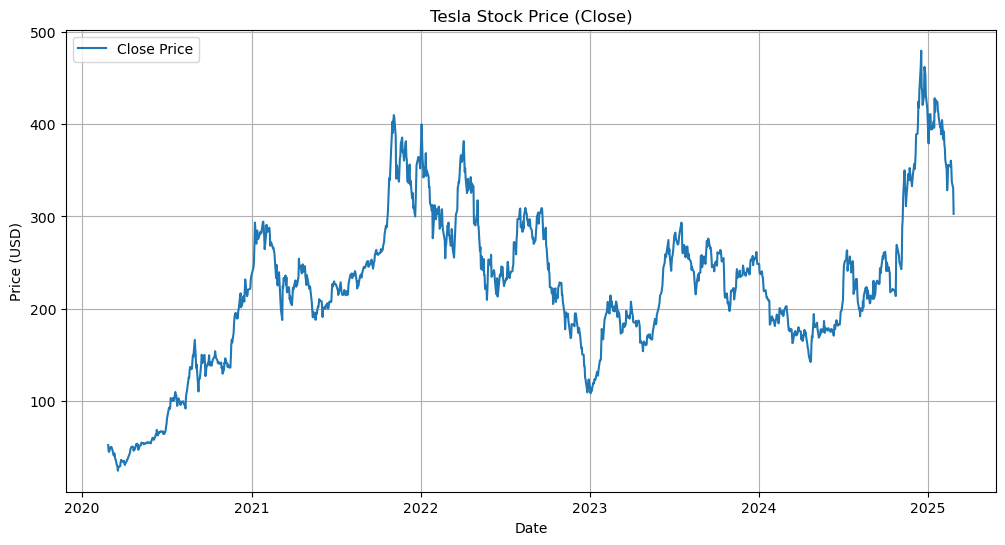

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download Tesla stock data (adjust period if needed)
tesla_data = yf.download("TSLA", period="5y")

# Reset the index to make 'Date' a column
tesla_data.reset_index(inplace=True)

# Function to create a graph (matplotlib)
def make_graph(df, title):
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed
    plt.plot(df['Date'], df['Close'], label='Close Price')  # Plotting 'Close' price
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to create the graph
make_graph(tesla_data, "Tesla Stock Price (Close)")

# --- Include the code above and the generated graph in your screenshot ---

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download GameStop stock data (adjust period if needed)
gme_data = yf.download("GME", period="5y")

# Reset the index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Function to create a graph (matplotlib) - Assuming you have this from Question 5
def make_graph(df, title):
    plt.figure(figsize=(12, 6))  # Adjust figure size if needed

[*********************100%***********************]  1 of 1 completed


In [5]:
pip install selenium


   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.5 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.5 MB 1.0 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/9.5 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.5 MB 1.3 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/9.5 MB 1.3 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.5 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.5 MB 1.4 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.5 MB 1.3 MB/s eta 0:00:06
   ---------- ----------------------------- 2.6/9.5 MB 1.3 MB/s eta 0:00:06
   ------------ --------------------------- 2.9/9.5 MB 1.3 MB/s eta 0:00:05
   ------------- -------------------------- 3.1/9.5 MB 1.4 MB/s eta 0:00:05
   -------------- ------------------------- 3.4/9.5 MB 1.4 MB/s eta 0:00:05
   --------------- ------

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page containing Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code != 200:
    raise Exception(f"Failed to fetch the webpage. Status code: {response.status_code}")

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Find the table containing Tesla's revenue data
table = soup.find("table", class_="historical_data_table table")  # Update the class name if needed

# If the table is not found, print an error message
if not table:
    raise ValueError("Table not found on the webpage. Please check the HTML structure.")

# Extract table headers
headers = [th.text.strip() for th in table.find_all("th")]
print(f"Headers: {headers}")  # Debugging: Print the headers

# Extract table rows
rows = table.find_all("tr")

# Create a list to store the data
data = []

# Loop through the rows and extract the data
for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    print(f"Row data: {cols}")  # Debugging: Print each row's data
    data.append(cols)

# Create a DataFrame from the extracted data
tesla_revenue = pd.DataFrame(data, columns=headers)

# Display the last five rows using the tail() function
print(tesla_revenue.tail())

Headers: ['Tesla Annual Revenue(Millions of US $)']
Row data: ['2024', '$97,690']
Row data: ['2023', '$96,773']
Row data: ['2022', '$81,462']
Row data: ['2021', '$53,823']
Row data: ['2020', '$31,536']
Row data: ['2019', '$24,578']
Row data: ['2018', '$21,461']
Row data: ['2017', '$11,759']
Row data: ['2016', '$7,000']
Row data: ['2015', '$4,046']
Row data: ['2014', '$3,198']
Row data: ['2013', '$2,013']
Row data: ['2012', '$413']
Row data: ['2011', '$204']
Row data: ['2010', '$117']
Row data: ['2009', '$112']


ValueError: 1 columns passed, passed data had 2 columns

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the page containing GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Send a GET request to the URL with headers
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code != 200:
    raise Exception(f"Failed to fetch the webpage. Status code: {response.status_code}")

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, "html.parser")

# Find the table containing GameStop's revenue data
table = soup.find("table", class_="historical_data_table table")  # Update the class name if needed

# If the table is not found, print an error message
if not table:
    raise ValueError("Table not found on the webpage. Please check the HTML structure.")

# Manually define the headers (since the table might have only one header)
headers = ['Year', 'Revenue (Millions of US $)']

# Extract table rows
rows = table.find_all("tr")

# Create a list to store the data
data = []

# Loop through the rows and extract the data
for row in rows[1:]:  # Skip the header row
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Create a DataFrame from the extracted data
gme_revenue = pd.DataFrame(data, columns=headers)

# Display the last five rows using the tail() function
print(gme_revenue.tail())

    Year Revenue (Millions of US $)
11  2013                     $8,887
12  2012                     $9,551
13  2011                     $9,474
14  2010                     $9,078
15  2009                     $8,806


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


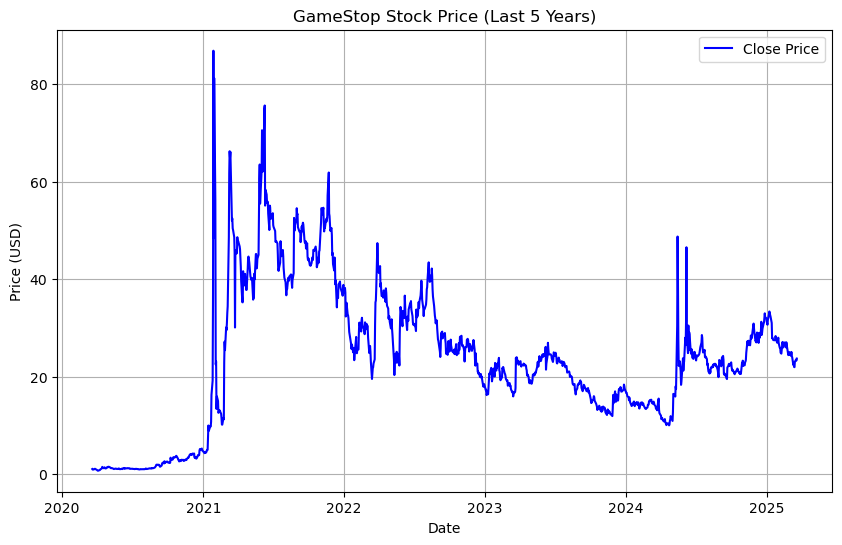

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol (GME for GameStop)
ticker = "GME"

# Download historical data (e.g., for the past 5 years - adjust as needed)
gme_data = yf.download(ticker, period="5y")

# Define the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the GameStop stock data
make_graph(gme_data, "GameStop Stock Price (Last 5 Years)")